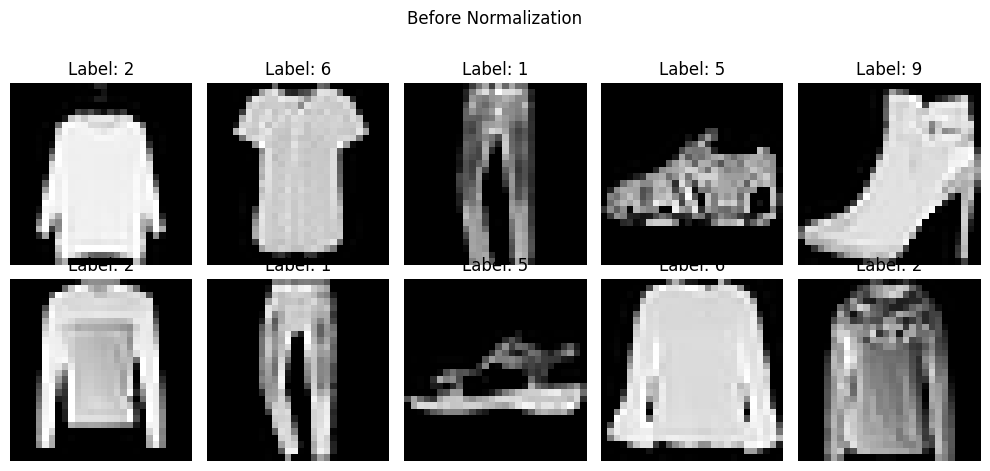

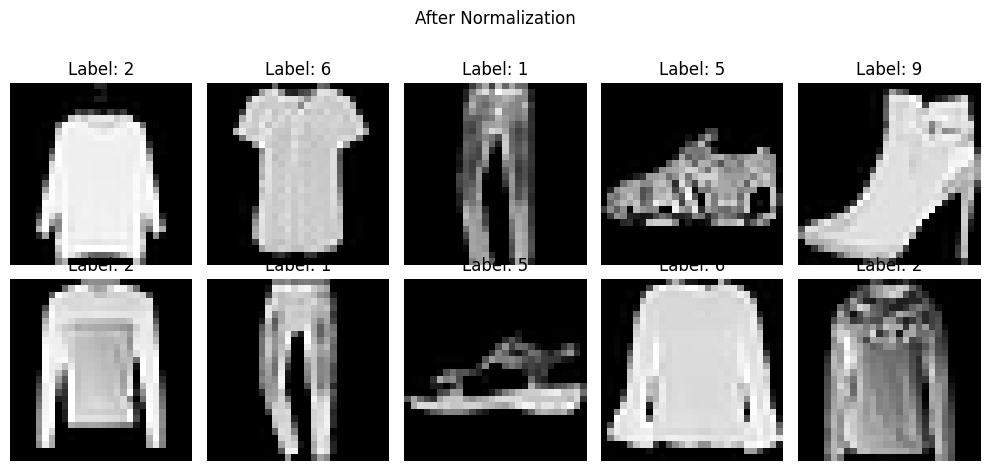

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

train_data = train_data.iloc[:8000]
test_data = test_data.iloc[:2000]

X_train = train_data.iloc[:, 1:].values 
y_train = train_data.iloc[:, 0].values 
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values    

random_indices = np.random.choice(range(len(X_test)), 10, replace=False)

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()
for idx, ax in zip(random_indices, axes):
    image = X_test[idx].reshape(28, 28)  
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {y_test[idx]}")
    ax.axis('off')
plt.suptitle("Before Normalization")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()
for idx, ax in zip(random_indices, axes):
    image = X_test[idx].reshape(28, 28) 
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {y_test[idx]}")
    ax.axis('off')
plt.suptitle("After Normalization")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
X_train_main, X_val, y_train_main, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

layer_sizes = [128, 64, 32]
batch_size = 128
learning_rate = 2e-5
max_iter = 100
activations = ['logistic', 'tanh', 'relu', 'identity']

history = {activation: {"train_loss": [], "val_loss": []} for activation in activations}

for activation in activations:
    mlp = MLPClassifier(hidden_layer_sizes=layer_sizes, activation=activation, solver='adam',
                        batch_size=batch_size, learning_rate_init=learning_rate, max_iter=1, warm_start=True)
    
    print(f"Training with activation function: {activation}")
    for epoch in range(max_iter):
        mlp.fit(X_train_main, y_train_main)
        
        train_loss = log_loss(y_train_main, mlp.predict_proba(X_train_main))
        val_loss = log_loss(y_val, mlp.predict_proba(X_val))
        
        history[activation]["train_loss"].append(train_loss)
        history[activation]["val_loss"].append(val_loss)
        
        print(f"Epoch {epoch + 1}/{max_iter} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f}")


Training with activation function: logistic


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 1/100 - Train Loss: 2.3669 - Val Loss: 2.3697


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 2/100 - Train Loss: 2.3586 - Val Loss: 2.3617


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 3/100 - Train Loss: 2.3511 - Val Loss: 2.3545


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 4/100 - Train Loss: 2.3443 - Val Loss: 2.3479


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 5/100 - Train Loss: 2.3380 - Val Loss: 2.3418


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 6/100 - Train Loss: 2.3320 - Val Loss: 2.3359


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 7/100 - Train Loss: 2.3266 - Val Loss: 2.3306


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 8/100 - Train Loss: 2.3215 - Val Loss: 2.3256


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 9/100 - Train Loss: 2.3168 - Val Loss: 2.3209


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 10/100 - Train Loss: 2.3124 - Val Loss: 2.3165


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 11/100 - Train Loss: 2.3082 - Val Loss: 2.3123


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 12/100 - Train Loss: 2.3040 - Val Loss: 2.3081


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 13/100 - Train Loss: 2.3001 - Val Loss: 2.3041


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 14/100 - Train Loss: 2.2961 - Val Loss: 2.3000


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 15/100 - Train Loss: 2.2924 - Val Loss: 2.2962


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 16/100 - Train Loss: 2.2886 - Val Loss: 2.2923


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 17/100 - Train Loss: 2.2849 - Val Loss: 2.2885


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 18/100 - Train Loss: 2.2810 - Val Loss: 2.2846


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 19/100 - Train Loss: 2.2773 - Val Loss: 2.2808


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 20/100 - Train Loss: 2.2734 - Val Loss: 2.2769


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 21/100 - Train Loss: 2.2696 - Val Loss: 2.2730


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 22/100 - Train Loss: 2.2655 - Val Loss: 2.2690


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 23/100 - Train Loss: 2.2615 - Val Loss: 2.2648


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 24/100 - Train Loss: 2.2575 - Val Loss: 2.2607


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 25/100 - Train Loss: 2.2533 - Val Loss: 2.2564


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 26/100 - Train Loss: 2.2490 - Val Loss: 2.2521


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 27/100 - Train Loss: 2.2447 - Val Loss: 2.2477


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 28/100 - Train Loss: 2.2401 - Val Loss: 2.2430


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 29/100 - Train Loss: 2.2355 - Val Loss: 2.2383


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 30/100 - Train Loss: 2.2307 - Val Loss: 2.2335


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 31/100 - Train Loss: 2.2259 - Val Loss: 2.2287


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 32/100 - Train Loss: 2.2210 - Val Loss: 2.2238


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 33/100 - Train Loss: 2.2160 - Val Loss: 2.2188


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 34/100 - Train Loss: 2.2107 - Val Loss: 2.2135


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 35/100 - Train Loss: 2.2052 - Val Loss: 2.2079


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 36/100 - Train Loss: 2.1996 - Val Loss: 2.2024


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 37/100 - Train Loss: 2.1940 - Val Loss: 2.1967


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 38/100 - Train Loss: 2.1881 - Val Loss: 2.1908


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 39/100 - Train Loss: 2.1820 - Val Loss: 2.1848


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 40/100 - Train Loss: 2.1759 - Val Loss: 2.1787


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 41/100 - Train Loss: 2.1696 - Val Loss: 2.1724


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 42/100 - Train Loss: 2.1632 - Val Loss: 2.1660


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 43/100 - Train Loss: 2.1566 - Val Loss: 2.1595


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 44/100 - Train Loss: 2.1500 - Val Loss: 2.1529


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 45/100 - Train Loss: 2.1433 - Val Loss: 2.1462


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 46/100 - Train Loss: 2.1364 - Val Loss: 2.1394


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 47/100 - Train Loss: 2.1296 - Val Loss: 2.1327


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 48/100 - Train Loss: 2.1225 - Val Loss: 2.1257


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 49/100 - Train Loss: 2.1154 - Val Loss: 2.1187


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 50/100 - Train Loss: 2.1080 - Val Loss: 2.1113


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 51/100 - Train Loss: 2.1005 - Val Loss: 2.1039


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 52/100 - Train Loss: 2.0928 - Val Loss: 2.0963


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 53/100 - Train Loss: 2.0851 - Val Loss: 2.0888


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 54/100 - Train Loss: 2.0774 - Val Loss: 2.0812


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 55/100 - Train Loss: 2.0697 - Val Loss: 2.0736


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 56/100 - Train Loss: 2.0618 - Val Loss: 2.0658


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 57/100 - Train Loss: 2.0539 - Val Loss: 2.0580


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 58/100 - Train Loss: 2.0459 - Val Loss: 2.0501


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 59/100 - Train Loss: 2.0377 - Val Loss: 2.0420


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 60/100 - Train Loss: 2.0294 - Val Loss: 2.0339


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 61/100 - Train Loss: 2.0212 - Val Loss: 2.0258


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 62/100 - Train Loss: 2.0127 - Val Loss: 2.0175


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 63/100 - Train Loss: 2.0044 - Val Loss: 2.0093


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 64/100 - Train Loss: 1.9960 - Val Loss: 2.0010


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 65/100 - Train Loss: 1.9876 - Val Loss: 1.9928


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 66/100 - Train Loss: 1.9792 - Val Loss: 1.9846


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 67/100 - Train Loss: 1.9709 - Val Loss: 1.9764


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 68/100 - Train Loss: 1.9624 - Val Loss: 1.9681


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 69/100 - Train Loss: 1.9538 - Val Loss: 1.9596


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 70/100 - Train Loss: 1.9455 - Val Loss: 1.9515


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 71/100 - Train Loss: 1.9370 - Val Loss: 1.9432


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 72/100 - Train Loss: 1.9287 - Val Loss: 1.9350


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 73/100 - Train Loss: 1.9206 - Val Loss: 1.9271


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 74/100 - Train Loss: 1.9124 - Val Loss: 1.9191


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 75/100 - Train Loss: 1.9040 - Val Loss: 1.9108


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 76/100 - Train Loss: 1.8959 - Val Loss: 1.9029


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 77/100 - Train Loss: 1.8878 - Val Loss: 1.8949


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 78/100 - Train Loss: 1.8796 - Val Loss: 1.8869


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 79/100 - Train Loss: 1.8715 - Val Loss: 1.8790


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 80/100 - Train Loss: 1.8633 - Val Loss: 1.8710


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 81/100 - Train Loss: 1.8551 - Val Loss: 1.8630


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 82/100 - Train Loss: 1.8471 - Val Loss: 1.8552


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 83/100 - Train Loss: 1.8392 - Val Loss: 1.8474


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 84/100 - Train Loss: 1.8315 - Val Loss: 1.8399


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 85/100 - Train Loss: 1.8238 - Val Loss: 1.8324


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 86/100 - Train Loss: 1.8161 - Val Loss: 1.8248


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 87/100 - Train Loss: 1.8085 - Val Loss: 1.8174


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 88/100 - Train Loss: 1.8009 - Val Loss: 1.8100


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 89/100 - Train Loss: 1.7933 - Val Loss: 1.8025


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 90/100 - Train Loss: 1.7859 - Val Loss: 1.7952


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 91/100 - Train Loss: 1.7785 - Val Loss: 1.7880


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 92/100 - Train Loss: 1.7712 - Val Loss: 1.7808


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 93/100 - Train Loss: 1.7639 - Val Loss: 1.7736


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 94/100 - Train Loss: 1.7565 - Val Loss: 1.7664


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 95/100 - Train Loss: 1.7492 - Val Loss: 1.7592


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 96/100 - Train Loss: 1.7420 - Val Loss: 1.7521


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 97/100 - Train Loss: 1.7349 - Val Loss: 1.7452


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 98/100 - Train Loss: 1.7279 - Val Loss: 1.7383


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 99/100 - Train Loss: 1.7211 - Val Loss: 1.7316


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 100/100 - Train Loss: 1.7143 - Val Loss: 1.7249
Training with activation function: tanh


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 1/100 - Train Loss: 2.1694 - Val Loss: 2.1669


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 2/100 - Train Loss: 1.9334 - Val Loss: 1.9356


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 3/100 - Train Loss: 1.7492 - Val Loss: 1.7530


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 4/100 - Train Loss: 1.6060 - Val Loss: 1.6077


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 5/100 - Train Loss: 1.4870 - Val Loss: 1.4864


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 6/100 - Train Loss: 1.3912 - Val Loss: 1.3885


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 7/100 - Train Loss: 1.3127 - Val Loss: 1.3084


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 8/100 - Train Loss: 1.2492 - Val Loss: 1.2443


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 9/100 - Train Loss: 1.1931 - Val Loss: 1.1876


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 10/100 - Train Loss: 1.1443 - Val Loss: 1.1384


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 11/100 - Train Loss: 1.1029 - Val Loss: 1.0966


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 12/100 - Train Loss: 1.0657 - Val Loss: 1.0611


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 13/100 - Train Loss: 1.0328 - Val Loss: 1.0256


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 14/100 - Train Loss: 1.0018 - Val Loss: 0.9977


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 15/100 - Train Loss: 0.9743 - Val Loss: 0.9706


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 16/100 - Train Loss: 0.9501 - Val Loss: 0.9450


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 17/100 - Train Loss: 0.9271 - Val Loss: 0.9229


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 18/100 - Train Loss: 0.9058 - Val Loss: 0.9025


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 19/100 - Train Loss: 0.8856 - Val Loss: 0.8826


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 20/100 - Train Loss: 0.8675 - Val Loss: 0.8650


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 21/100 - Train Loss: 0.8505 - Val Loss: 0.8490


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 22/100 - Train Loss: 0.8345 - Val Loss: 0.8331


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 23/100 - Train Loss: 0.8185 - Val Loss: 0.8180


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 24/100 - Train Loss: 0.8049 - Val Loss: 0.8050


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 25/100 - Train Loss: 0.7909 - Val Loss: 0.7919


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 26/100 - Train Loss: 0.7779 - Val Loss: 0.7804


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 27/100 - Train Loss: 0.7656 - Val Loss: 0.7695


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 28/100 - Train Loss: 0.7531 - Val Loss: 0.7565


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 29/100 - Train Loss: 0.7414 - Val Loss: 0.7449


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 30/100 - Train Loss: 0.7306 - Val Loss: 0.7343


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 31/100 - Train Loss: 0.7198 - Val Loss: 0.7242


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 32/100 - Train Loss: 0.7098 - Val Loss: 0.7154


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 33/100 - Train Loss: 0.7007 - Val Loss: 0.7075


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 34/100 - Train Loss: 0.6910 - Val Loss: 0.6976


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 35/100 - Train Loss: 0.6818 - Val Loss: 0.6894


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 36/100 - Train Loss: 0.6732 - Val Loss: 0.6804


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 37/100 - Train Loss: 0.6651 - Val Loss: 0.6731


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 38/100 - Train Loss: 0.6568 - Val Loss: 0.6655


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 39/100 - Train Loss: 0.6494 - Val Loss: 0.6585


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 40/100 - Train Loss: 0.6420 - Val Loss: 0.6523


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 41/100 - Train Loss: 0.6350 - Val Loss: 0.6469


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 42/100 - Train Loss: 0.6280 - Val Loss: 0.6400


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 43/100 - Train Loss: 0.6212 - Val Loss: 0.6329


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 44/100 - Train Loss: 0.6158 - Val Loss: 0.6267


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 45/100 - Train Loss: 0.6092 - Val Loss: 0.6233


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 46/100 - Train Loss: 0.6032 - Val Loss: 0.6171


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 47/100 - Train Loss: 0.5975 - Val Loss: 0.6123


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 48/100 - Train Loss: 0.5917 - Val Loss: 0.6069


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 49/100 - Train Loss: 0.5861 - Val Loss: 0.6002


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 50/100 - Train Loss: 0.5808 - Val Loss: 0.5971


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 51/100 - Train Loss: 0.5756 - Val Loss: 0.5929


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 52/100 - Train Loss: 0.5701 - Val Loss: 0.5859


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 53/100 - Train Loss: 0.5652 - Val Loss: 0.5819


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 54/100 - Train Loss: 0.5605 - Val Loss: 0.5779


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 55/100 - Train Loss: 0.5564 - Val Loss: 0.5729


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 56/100 - Train Loss: 0.5515 - Val Loss: 0.5697


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 57/100 - Train Loss: 0.5475 - Val Loss: 0.5673


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 58/100 - Train Loss: 0.5432 - Val Loss: 0.5628


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 59/100 - Train Loss: 0.5393 - Val Loss: 0.5589


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 60/100 - Train Loss: 0.5357 - Val Loss: 0.5578


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 61/100 - Train Loss: 0.5315 - Val Loss: 0.5536


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 62/100 - Train Loss: 0.5279 - Val Loss: 0.5484


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 63/100 - Train Loss: 0.5240 - Val Loss: 0.5462


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 64/100 - Train Loss: 0.5202 - Val Loss: 0.5433


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 65/100 - Train Loss: 0.5166 - Val Loss: 0.5399


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 66/100 - Train Loss: 0.5135 - Val Loss: 0.5378


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 67/100 - Train Loss: 0.5101 - Val Loss: 0.5335


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 68/100 - Train Loss: 0.5071 - Val Loss: 0.5319


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 69/100 - Train Loss: 0.5038 - Val Loss: 0.5277


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 70/100 - Train Loss: 0.5001 - Val Loss: 0.5265


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 71/100 - Train Loss: 0.4971 - Val Loss: 0.5246


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 72/100 - Train Loss: 0.4941 - Val Loss: 0.5218


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 73/100 - Train Loss: 0.4908 - Val Loss: 0.5185


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 74/100 - Train Loss: 0.4881 - Val Loss: 0.5155


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 75/100 - Train Loss: 0.4850 - Val Loss: 0.5138


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 76/100 - Train Loss: 0.4824 - Val Loss: 0.5125


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 77/100 - Train Loss: 0.4792 - Val Loss: 0.5093


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 78/100 - Train Loss: 0.4776 - Val Loss: 0.5076


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 79/100 - Train Loss: 0.4741 - Val Loss: 0.5052


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 80/100 - Train Loss: 0.4716 - Val Loss: 0.5047


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 81/100 - Train Loss: 0.4698 - Val Loss: 0.5011


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 82/100 - Train Loss: 0.4666 - Val Loss: 0.4996


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 83/100 - Train Loss: 0.4648 - Val Loss: 0.4981


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 84/100 - Train Loss: 0.4622 - Val Loss: 0.4946


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 85/100 - Train Loss: 0.4594 - Val Loss: 0.4939


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 86/100 - Train Loss: 0.4572 - Val Loss: 0.4928


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 87/100 - Train Loss: 0.4547 - Val Loss: 0.4911


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 88/100 - Train Loss: 0.4524 - Val Loss: 0.4892


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 89/100 - Train Loss: 0.4501 - Val Loss: 0.4874


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 90/100 - Train Loss: 0.4483 - Val Loss: 0.4855


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 91/100 - Train Loss: 0.4458 - Val Loss: 0.4831


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 92/100 - Train Loss: 0.4439 - Val Loss: 0.4834


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 93/100 - Train Loss: 0.4417 - Val Loss: 0.4816


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 94/100 - Train Loss: 0.4397 - Val Loss: 0.4812


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 95/100 - Train Loss: 0.4380 - Val Loss: 0.4781


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 96/100 - Train Loss: 0.4358 - Val Loss: 0.4762


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 97/100 - Train Loss: 0.4334 - Val Loss: 0.4750


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 98/100 - Train Loss: 0.4316 - Val Loss: 0.4735


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 99/100 - Train Loss: 0.4300 - Val Loss: 0.4739


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 100/100 - Train Loss: 0.4277 - Val Loss: 0.4721
Training with activation function: relu


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 1/100 - Train Loss: 2.1769 - Val Loss: 2.1641


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 2/100 - Train Loss: 2.0504 - Val Loss: 2.0432


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 3/100 - Train Loss: 1.9288 - Val Loss: 1.9247


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 4/100 - Train Loss: 1.8118 - Val Loss: 1.8103


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 5/100 - Train Loss: 1.7030 - Val Loss: 1.7050


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 6/100 - Train Loss: 1.5995 - Val Loss: 1.6042


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 7/100 - Train Loss: 1.5065 - Val Loss: 1.5130


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 8/100 - Train Loss: 1.4184 - Val Loss: 1.4258


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 9/100 - Train Loss: 1.3382 - Val Loss: 1.3453


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 10/100 - Train Loss: 1.2646 - Val Loss: 1.2726


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 11/100 - Train Loss: 1.2001 - Val Loss: 1.2075


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 12/100 - Train Loss: 1.1445 - Val Loss: 1.1513


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 13/100 - Train Loss: 1.0953 - Val Loss: 1.1034


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 14/100 - Train Loss: 1.0516 - Val Loss: 1.0595


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 15/100 - Train Loss: 1.0117 - Val Loss: 1.0194


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 16/100 - Train Loss: 0.9757 - Val Loss: 0.9843


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 17/100 - Train Loss: 0.9435 - Val Loss: 0.9539


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 18/100 - Train Loss: 0.9145 - Val Loss: 0.9243


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 19/100 - Train Loss: 0.8890 - Val Loss: 0.8988


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 20/100 - Train Loss: 0.8650 - Val Loss: 0.8773


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 21/100 - Train Loss: 0.8444 - Val Loss: 0.8551


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 22/100 - Train Loss: 0.8251 - Val Loss: 0.8370


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 23/100 - Train Loss: 0.8071 - Val Loss: 0.8182


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 24/100 - Train Loss: 0.7908 - Val Loss: 0.8047


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 25/100 - Train Loss: 0.7754 - Val Loss: 0.7871


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 26/100 - Train Loss: 0.7604 - Val Loss: 0.7735


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 27/100 - Train Loss: 0.7467 - Val Loss: 0.7602


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 28/100 - Train Loss: 0.7349 - Val Loss: 0.7501


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 29/100 - Train Loss: 0.7231 - Val Loss: 0.7376


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 30/100 - Train Loss: 0.7121 - Val Loss: 0.7282


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 31/100 - Train Loss: 0.7022 - Val Loss: 0.7179


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 32/100 - Train Loss: 0.6922 - Val Loss: 0.7110


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 33/100 - Train Loss: 0.6835 - Val Loss: 0.7023


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 34/100 - Train Loss: 0.6749 - Val Loss: 0.6952


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 35/100 - Train Loss: 0.6668 - Val Loss: 0.6873


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 36/100 - Train Loss: 0.6590 - Val Loss: 0.6782


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 37/100 - Train Loss: 0.6521 - Val Loss: 0.6694


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 38/100 - Train Loss: 0.6437 - Val Loss: 0.6639


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 39/100 - Train Loss: 0.6365 - Val Loss: 0.6585


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 40/100 - Train Loss: 0.6299 - Val Loss: 0.6530


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 41/100 - Train Loss: 0.6234 - Val Loss: 0.6442


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 42/100 - Train Loss: 0.6174 - Val Loss: 0.6408


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 43/100 - Train Loss: 0.6113 - Val Loss: 0.6355


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 44/100 - Train Loss: 0.6056 - Val Loss: 0.6282


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 45/100 - Train Loss: 0.6011 - Val Loss: 0.6239


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 46/100 - Train Loss: 0.5961 - Val Loss: 0.6229


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 47/100 - Train Loss: 0.5901 - Val Loss: 0.6150


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 48/100 - Train Loss: 0.5849 - Val Loss: 0.6103


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 49/100 - Train Loss: 0.5801 - Val Loss: 0.6058


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 50/100 - Train Loss: 0.5756 - Val Loss: 0.6024


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 51/100 - Train Loss: 0.5709 - Val Loss: 0.5987


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 52/100 - Train Loss: 0.5668 - Val Loss: 0.5925


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 53/100 - Train Loss: 0.5629 - Val Loss: 0.5892


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 54/100 - Train Loss: 0.5595 - Val Loss: 0.5885


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 55/100 - Train Loss: 0.5551 - Val Loss: 0.5829


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 56/100 - Train Loss: 0.5507 - Val Loss: 0.5781


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 57/100 - Train Loss: 0.5466 - Val Loss: 0.5762


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 58/100 - Train Loss: 0.5433 - Val Loss: 0.5735


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 59/100 - Train Loss: 0.5404 - Val Loss: 0.5692


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 60/100 - Train Loss: 0.5367 - Val Loss: 0.5687


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 61/100 - Train Loss: 0.5332 - Val Loss: 0.5643


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 62/100 - Train Loss: 0.5307 - Val Loss: 0.5593


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 63/100 - Train Loss: 0.5274 - Val Loss: 0.5573


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 64/100 - Train Loss: 0.5244 - Val Loss: 0.5568


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 65/100 - Train Loss: 0.5211 - Val Loss: 0.5546


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 66/100 - Train Loss: 0.5182 - Val Loss: 0.5501


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 67/100 - Train Loss: 0.5153 - Val Loss: 0.5483


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 68/100 - Train Loss: 0.5126 - Val Loss: 0.5457


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 69/100 - Train Loss: 0.5097 - Val Loss: 0.5440


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 70/100 - Train Loss: 0.5076 - Val Loss: 0.5400


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 71/100 - Train Loss: 0.5046 - Val Loss: 0.5387


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 72/100 - Train Loss: 0.5024 - Val Loss: 0.5369


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 73/100 - Train Loss: 0.4996 - Val Loss: 0.5353


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 74/100 - Train Loss: 0.4968 - Val Loss: 0.5324


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 75/100 - Train Loss: 0.4942 - Val Loss: 0.5314


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 76/100 - Train Loss: 0.4924 - Val Loss: 0.5295


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 77/100 - Train Loss: 0.4898 - Val Loss: 0.5261


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 78/100 - Train Loss: 0.4874 - Val Loss: 0.5249


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 79/100 - Train Loss: 0.4854 - Val Loss: 0.5229


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 80/100 - Train Loss: 0.4830 - Val Loss: 0.5217


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 81/100 - Train Loss: 0.4808 - Val Loss: 0.5188


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 82/100 - Train Loss: 0.4786 - Val Loss: 0.5200


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 83/100 - Train Loss: 0.4769 - Val Loss: 0.5190


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 84/100 - Train Loss: 0.4749 - Val Loss: 0.5156


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 85/100 - Train Loss: 0.4722 - Val Loss: 0.5125


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 86/100 - Train Loss: 0.4708 - Val Loss: 0.5129


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 87/100 - Train Loss: 0.4695 - Val Loss: 0.5114


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 88/100 - Train Loss: 0.4665 - Val Loss: 0.5085


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 89/100 - Train Loss: 0.4672 - Val Loss: 0.5125


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 90/100 - Train Loss: 0.4634 - Val Loss: 0.5073


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 91/100 - Train Loss: 0.4607 - Val Loss: 0.5037


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 92/100 - Train Loss: 0.4587 - Val Loss: 0.5025


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 93/100 - Train Loss: 0.4571 - Val Loss: 0.5014


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 94/100 - Train Loss: 0.4552 - Val Loss: 0.4991


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 95/100 - Train Loss: 0.4534 - Val Loss: 0.4993


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 96/100 - Train Loss: 0.4522 - Val Loss: 0.4965


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 97/100 - Train Loss: 0.4501 - Val Loss: 0.4946


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 98/100 - Train Loss: 0.4483 - Val Loss: 0.4940


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 99/100 - Train Loss: 0.4471 - Val Loss: 0.4961


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 100/100 - Train Loss: 0.4459 - Val Loss: 0.4947
Training with activation function: identity


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 1/100 - Train Loss: 2.1977 - Val Loss: 2.2119


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 2/100 - Train Loss: 1.8218 - Val Loss: 1.8355


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 3/100 - Train Loss: 1.5565 - Val Loss: 1.5657


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 4/100 - Train Loss: 1.3569 - Val Loss: 1.3656


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 5/100 - Train Loss: 1.2168 - Val Loss: 1.2248


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 6/100 - Train Loss: 1.1071 - Val Loss: 1.1118


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 7/100 - Train Loss: 1.0193 - Val Loss: 1.0247


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 8/100 - Train Loss: 0.9553 - Val Loss: 0.9667


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 9/100 - Train Loss: 0.8983 - Val Loss: 0.9056


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 10/100 - Train Loss: 0.8555 - Val Loss: 0.8638


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 11/100 - Train Loss: 0.8216 - Val Loss: 0.8314


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 12/100 - Train Loss: 0.7898 - Val Loss: 0.8024


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 13/100 - Train Loss: 0.7628 - Val Loss: 0.7762


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 14/100 - Train Loss: 0.7403 - Val Loss: 0.7554


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 15/100 - Train Loss: 0.7193 - Val Loss: 0.7342


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 16/100 - Train Loss: 0.7022 - Val Loss: 0.7188


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 17/100 - Train Loss: 0.6874 - Val Loss: 0.7041


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 18/100 - Train Loss: 0.6719 - Val Loss: 0.6907


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 19/100 - Train Loss: 0.6598 - Val Loss: 0.6800


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 20/100 - Train Loss: 0.6472 - Val Loss: 0.6664


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 21/100 - Train Loss: 0.6364 - Val Loss: 0.6556


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 22/100 - Train Loss: 0.6258 - Val Loss: 0.6476


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 23/100 - Train Loss: 0.6174 - Val Loss: 0.6382


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 24/100 - Train Loss: 0.6079 - Val Loss: 0.6293


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 25/100 - Train Loss: 0.6034 - Val Loss: 0.6223


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 26/100 - Train Loss: 0.5945 - Val Loss: 0.6150


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 27/100 - Train Loss: 0.5862 - Val Loss: 0.6106


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 28/100 - Train Loss: 0.5795 - Val Loss: 0.6041


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 29/100 - Train Loss: 0.5741 - Val Loss: 0.6004


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 30/100 - Train Loss: 0.5686 - Val Loss: 0.5946


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 31/100 - Train Loss: 0.5618 - Val Loss: 0.5886


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 32/100 - Train Loss: 0.5571 - Val Loss: 0.5835


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 33/100 - Train Loss: 0.5553 - Val Loss: 0.5853


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 34/100 - Train Loss: 0.5475 - Val Loss: 0.5749


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 35/100 - Train Loss: 0.5443 - Val Loss: 0.5721


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 36/100 - Train Loss: 0.5388 - Val Loss: 0.5686


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 37/100 - Train Loss: 0.5344 - Val Loss: 0.5639


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 38/100 - Train Loss: 0.5304 - Val Loss: 0.5612


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 39/100 - Train Loss: 0.5269 - Val Loss: 0.5579


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 40/100 - Train Loss: 0.5238 - Val Loss: 0.5593


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 41/100 - Train Loss: 0.5209 - Val Loss: 0.5537


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 42/100 - Train Loss: 0.5159 - Val Loss: 0.5503


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 43/100 - Train Loss: 0.5139 - Val Loss: 0.5449


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 44/100 - Train Loss: 0.5097 - Val Loss: 0.5448


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 45/100 - Train Loss: 0.5060 - Val Loss: 0.5397


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 46/100 - Train Loss: 0.5028 - Val Loss: 0.5392


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 47/100 - Train Loss: 0.5000 - Val Loss: 0.5369


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 48/100 - Train Loss: 0.4976 - Val Loss: 0.5346


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 49/100 - Train Loss: 0.4944 - Val Loss: 0.5325


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 50/100 - Train Loss: 0.4922 - Val Loss: 0.5302


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 51/100 - Train Loss: 0.4896 - Val Loss: 0.5305


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 52/100 - Train Loss: 0.4888 - Val Loss: 0.5283


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 53/100 - Train Loss: 0.4854 - Val Loss: 0.5287


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 54/100 - Train Loss: 0.4814 - Val Loss: 0.5251


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 55/100 - Train Loss: 0.4788 - Val Loss: 0.5221


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 56/100 - Train Loss: 0.4786 - Val Loss: 0.5197


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 57/100 - Train Loss: 0.4747 - Val Loss: 0.5201


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 58/100 - Train Loss: 0.4727 - Val Loss: 0.5165


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 59/100 - Train Loss: 0.4702 - Val Loss: 0.5151


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 60/100 - Train Loss: 0.4686 - Val Loss: 0.5132


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 61/100 - Train Loss: 0.4660 - Val Loss: 0.5114


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 62/100 - Train Loss: 0.4646 - Val Loss: 0.5099


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 63/100 - Train Loss: 0.4629 - Val Loss: 0.5124


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 64/100 - Train Loss: 0.4598 - Val Loss: 0.5084


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 65/100 - Train Loss: 0.4577 - Val Loss: 0.5075


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 66/100 - Train Loss: 0.4576 - Val Loss: 0.5040


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 67/100 - Train Loss: 0.4542 - Val Loss: 0.5047


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 68/100 - Train Loss: 0.4523 - Val Loss: 0.5027


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 69/100 - Train Loss: 0.4504 - Val Loss: 0.5028


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 70/100 - Train Loss: 0.4499 - Val Loss: 0.5006


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 71/100 - Train Loss: 0.4474 - Val Loss: 0.5018


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 72/100 - Train Loss: 0.4454 - Val Loss: 0.4994


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 73/100 - Train Loss: 0.4457 - Val Loss: 0.4988


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 74/100 - Train Loss: 0.4433 - Val Loss: 0.5012


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 75/100 - Train Loss: 0.4408 - Val Loss: 0.4963


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 76/100 - Train Loss: 0.4390 - Val Loss: 0.4956


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 77/100 - Train Loss: 0.4379 - Val Loss: 0.4950


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 78/100 - Train Loss: 0.4362 - Val Loss: 0.4932


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 79/100 - Train Loss: 0.4351 - Val Loss: 0.4963


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 80/100 - Train Loss: 0.4333 - Val Loss: 0.4924


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 81/100 - Train Loss: 0.4326 - Val Loss: 0.4924


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 82/100 - Train Loss: 0.4303 - Val Loss: 0.4905


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 83/100 - Train Loss: 0.4308 - Val Loss: 0.4973


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 84/100 - Train Loss: 0.4276 - Val Loss: 0.4899


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 85/100 - Train Loss: 0.4289 - Val Loss: 0.4940


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 86/100 - Train Loss: 0.4267 - Val Loss: 0.4939


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 87/100 - Train Loss: 0.4244 - Val Loss: 0.4884


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 88/100 - Train Loss: 0.4233 - Val Loss: 0.4883


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 89/100 - Train Loss: 0.4237 - Val Loss: 0.4864


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 90/100 - Train Loss: 0.4219 - Val Loss: 0.4850


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 91/100 - Train Loss: 0.4184 - Val Loss: 0.4873


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 92/100 - Train Loss: 0.4176 - Val Loss: 0.4846


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 93/100 - Train Loss: 0.4160 - Val Loss: 0.4839


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 94/100 - Train Loss: 0.4154 - Val Loss: 0.4869


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 95/100 - Train Loss: 0.4151 - Val Loss: 0.4838


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 96/100 - Train Loss: 0.4135 - Val Loss: 0.4879


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 97/100 - Train Loss: 0.4113 - Val Loss: 0.4847


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 98/100 - Train Loss: 0.4105 - Val Loss: 0.4827


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 99/100 - Train Loss: 0.4086 - Val Loss: 0.4813
Epoch 100/100 - Train Loss: 0.4080 - Val Loss: 0.4823


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


In [3]:
# Print final training and validation losses for each activation function
print("Summary of Final Training and Validation Losses:")
for activation in history.keys():
    final_train_loss = history[activation]["train_loss"][-1]
    final_val_loss = history[activation]["val_loss"][-1]
    print(f"Activation: {activation} - Final Train Loss: {final_train_loss:.4f} - Final Val Loss: {final_val_loss:.4f}")


Summary of Final Training and Validation Losses:
Activation: logistic - Final Train Loss: 1.7143 - Final Val Loss: 1.7249
Activation: tanh - Final Train Loss: 0.4277 - Final Val Loss: 0.4721
Activation: relu - Final Train Loss: 0.4459 - Final Val Loss: 0.4947
Activation: identity - Final Train Loss: 0.4080 - Final Val Loss: 0.4823


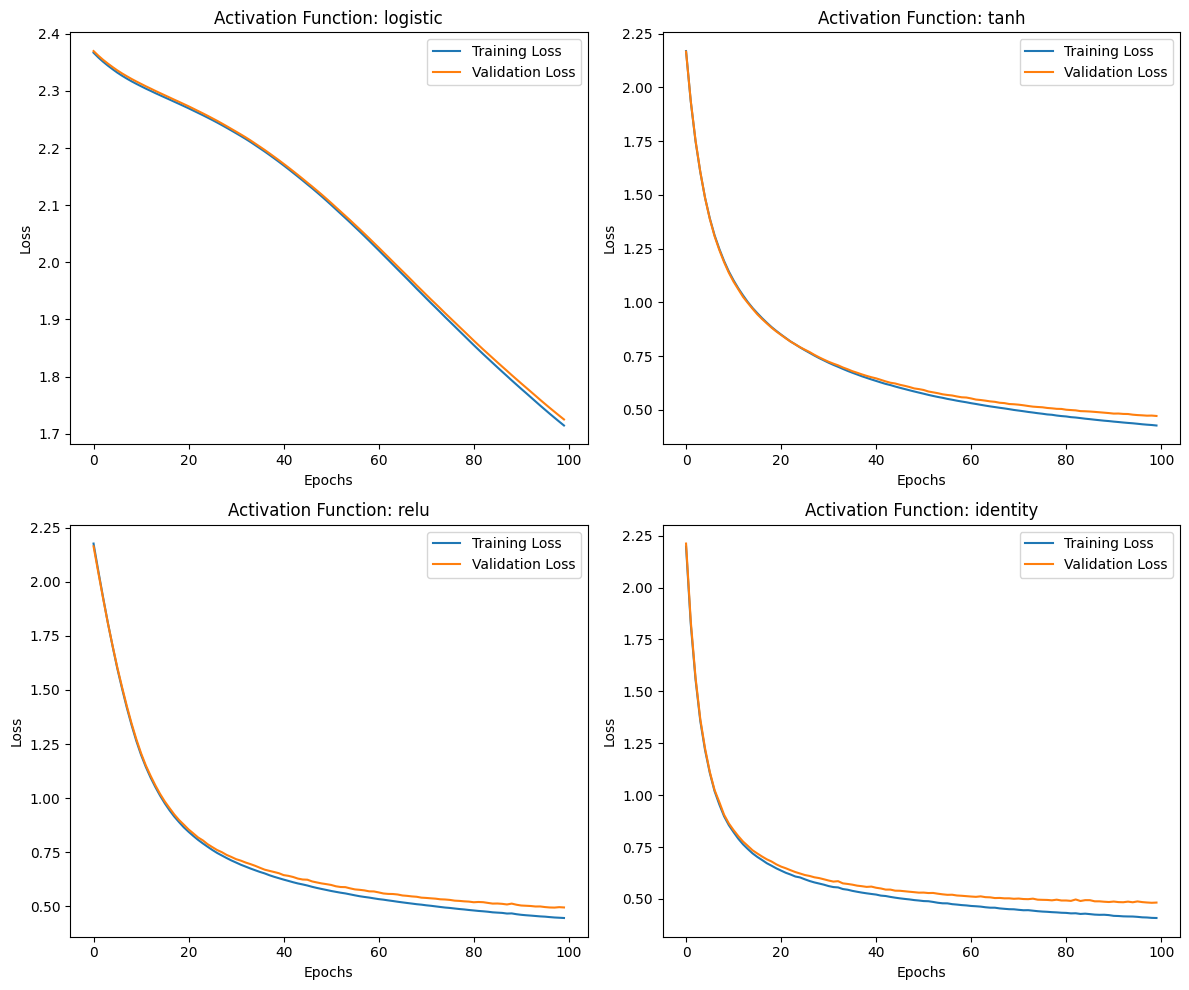

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, activation in enumerate(activations):
    axes[i].plot(history[activation]["train_loss"], label="Training Loss")
    axes[i].plot(history[activation]["val_loss"], label="Validation Loss")
    axes[i].set_title(f"Activation Function: {activation}")
    axes[i].set_xlabel("Epochs")
    axes[i].set_ylabel("Loss")
    axes[i].legend()

plt.tight_layout()
plt.show()

In [ ]:

best_activation = 'tanh'

param_grid = {
    'solver': ['adam', 'sgd', 'lbfgs'],
    'learning_rate_init': [1e-4, 5e-5, 2e-5, 1e-5],
    'batch_size': [64, 128, 256]
}

mlp = MLPClassifier(hidden_layer_sizes=[128, 64, 32], activation=best_activation, max_iter=100)

grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='neg_log_loss', cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train_main, y_train_main)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Validation Score (Negative Log Loss):", best_score)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=64, learning_rate_init=1e-05, solver=lbfgs; total time=  34.3s
[CV] END batch_size=64, learning_rate_init=1e-05, solver=lbfgs; total time=  34.4s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=64, learning_rate_init=2e-05, solver=lbfgs; total time=  34.8s
[CV] END batch_size=64, learning_rate_init=1e-05, solver=lbfgs; total time=  34.8s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=64, learning_rate_init=2e-05, solver=lbfgs; total time=  35.6s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=64, learning_rate_init=5e-05, solver=lbfgs; total time=  36.5s
[CV] END batch_size=64, learning_rate_init=5e-05, solver=lbfgs; total time=  36.6s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=64, learning_rate_init=0.0001, solver=lbfgs; total time=  40.0s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=64, learning_rate_init=5e-05, solver=lbfgs; total time=  41.3s
[CV] END batch_size=64, learning_rate_init=0.0001, solver=lbfgs; total time=  41.6s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=64, learning_rate_init=2e-05, solver=lbfgs; total time=  42.6s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=64, learning_rate_init=0.0001, solver=lbfgs; total time=  44.3s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=128, learning_rate_init=0.0001, solver=sgd; total time= 1.2min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=128, learning_rate_init=0.0001, solver=lbfgs; total time=  35.9s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=128, learning_rate_init=0.0001, solver=lbfgs; total time=  37.2s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=128, learning_rate_init=0.0001, solver=lbfgs; total time=  38.3s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=128, learning_rate_init=0.0001, solver=adam; total time= 1.3min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=128, learning_rate_init=0.0001, solver=adam; total time= 1.4min
[CV] END batch_size=128, learning_rate_init=0.0001, solver=adam; total time= 1.4min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=128, learning_rate_init=5e-05, solver=lbfgs; total time=  42.6s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=128, learning_rate_init=5e-05, solver=lbfgs; total time=  28.3s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=128, learning_rate_init=0.0001, solver=sgd; total time= 1.1min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=64, learning_rate_init=1e-05, solver=sgd; total time= 1.7min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=128, learning_rate_init=0.0001, solver=sgd; total time= 1.1min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=128, learning_rate_init=5e-05, solver=lbfgs; total time=  38.7s
[CV] END batch_size=64, learning_rate_init=5e-05, solver=sgd; total time= 1.8min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=64, learning_rate_init=1e-05, solver=sgd; total time= 1.9min
[CV] END batch_size=64, learning_rate_init=1e-05, solver=sgd; total time= 1.9min
[CV] END batch_size=64, learning_rate_init=0.0001, solver=sgd; total time= 1.9min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=128, learning_rate_init=5e-05, solver=adam; total time= 1.3min
[CV] END batch_size=128, learning_rate_init=5e-05, solver=adam; total time= 1.3min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=128, learning_rate_init=5e-05, solver=sgd; total time= 1.3min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=128, learning_rate_init=5e-05, solver=sgd; total time= 1.3min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=64, learning_rate_init=0.0001, solver=sgd; total time= 2.1min
[CV] END batch_size=128, learning_rate_init=5e-05, solver=sgd; total time= 1.4min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=64, learning_rate_init=0.0001, solver=adam; total time= 2.1min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=64, learning_rate_init=0.0001, solver=sgd; total time= 2.2min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=64, learning_rate_init=2e-05, solver=adam; total time= 2.2min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=64, learning_rate_init=5e-05, solver=sgd; total time= 2.2min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=64, learning_rate_init=5e-05, solver=sgd; total time= 2.2min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=128, learning_rate_init=2e-05, solver=lbfgs; total time=  35.0s
[CV] END batch_size=128, learning_rate_init=5e-05, solver=adam; total time= 1.6min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=64, learning_rate_init=1e-05, solver=adam; total time= 2.3min
[CV] END batch_size=64, learning_rate_init=2e-05, solver=sgd; total time= 2.3min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=64, learning_rate_init=2e-05, solver=sgd; total time= 2.3min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=64, learning_rate_init=2e-05, solver=sgd; total time= 2.3min
[CV] END batch_size=128, learning_rate_init=2e-05, solver=lbfgs; total time=  37.7s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=128, learning_rate_init=2e-05, solver=lbfgs; total time=  37.5s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=128, learning_rate_init=2e-05, solver=adam; total time= 1.3min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=128, learning_rate_init=1e-05, solver=lbfgs; total time=  36.4s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=128, learning_rate_init=1e-05, solver=lbfgs; total time=  36.9s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=128, learning_rate_init=2e-05, solver=sgd; total time= 1.2min
[CV] END batch_size=128, learning_rate_init=2e-05, solver=sgd; total time= 1.2min
[CV] END batch_size=128, learning_rate_init=2e-05, solver=adam; total time= 1.3min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=64, learning_rate_init=5e-05, solver=adam; total time= 2.5min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=64, learning_rate_init=0.0001, solver=adam; total time= 2.6min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=64, learning_rate_init=5e-05, solver=adam; total time= 2.6min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=128, learning_rate_init=2e-05, solver=adam; total time= 1.3min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=64, learning_rate_init=0.0001, solver=adam; total time= 2.6min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=64, learning_rate_init=2e-05, solver=adam; total time= 2.6min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=64, learning_rate_init=2e-05, solver=adam; total time= 2.6min
[CV] END batch_size=64, learning_rate_init=1e-05, solver=adam; total time= 2.6min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=64, learning_rate_init=1e-05, solver=adam; total time= 2.7min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=64, learning_rate_init=5e-05, solver=adam; total time= 2.7min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=128, learning_rate_init=1e-05, solver=lbfgs; total time=  40.0s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=128, learning_rate_init=2e-05, solver=sgd; total time= 1.2min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=256, learning_rate_init=0.0001, solver=lbfgs; total time=  34.3s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=256, learning_rate_init=0.0001, solver=lbfgs; total time=  37.4s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=256, learning_rate_init=0.0001, solver=sgd; total time=  45.0s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=256, learning_rate_init=0.0001, solver=lbfgs; total time=  39.9s
[CV] END batch_size=128, learning_rate_init=1e-05, solver=sgd; total time= 1.0min
[CV] END batch_size=128, learning_rate_init=1e-05, solver=sgd; total time= 1.0min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=128, learning_rate_init=1e-05, solver=sgd; total time= 1.0min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=256, learning_rate_init=5e-05, solver=lbfgs; total time=  35.3s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=128, learning_rate_init=1e-05, solver=adam; total time= 1.2min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=256, learning_rate_init=0.0001, solver=adam; total time=  54.3s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=256, learning_rate_init=5e-05, solver=adam; total time=  42.0s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=128, learning_rate_init=1e-05, solver=adam; total time= 1.1min
[CV] END batch_size=256, learning_rate_init=0.0001, solver=sgd; total time=  45.6s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=128, learning_rate_init=1e-05, solver=adam; total time= 1.2min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=256, learning_rate_init=5e-05, solver=sgd; total time=  41.2s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.o

[CV] END batch_size=256, learning_rate_init=5e-05, solver=lbfgs; total time=  30.3s
[CV] END batch_size=256, learning_rate_init=0.0001, solver=adam; total time=  53.9s
[CV] END batch_size=256, learning_rate_init=5e-05, solver=lbfgs; total time=  33.1s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=256, learning_rate_init=0.0001, solver=adam; total time=  54.1s
[CV] END batch_size=256, learning_rate_init=0.0001, solver=sgd; total time=  49.1s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=256, learning_rate_init=5e-05, solver=sgd; total time=  46.7s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=256, learning_rate_init=5e-05, solver=adam; total time=  48.3s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=256, learning_rate_init=2e-05, solver=lbfgs; total time=  28.9s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=256, learning_rate_init=2e-05, solver=lbfgs; total time=  30.7s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=256, learning_rate_init=5e-05, solver=sgd; total time=  46.9s
[CV] END batch_size=256, learning_rate_init=2e-05, solver=adam; total time=  34.6s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=256, learning_rate_init=2e-05, solver=sgd; total time=  35.4s
[CV] END batch_size=256, learning_rate_init=5e-05, solver=adam; total time=  51.9s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=256, learning_rate_init=2e-05, solver=adam; total time=  36.2s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=256, learning_rate_init=2e-05, solver=adam; total time=  36.5s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=256, learning_rate_init=2e-05, solver=lbfgs; total time=  32.3s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=256, learning_rate_init=2e-05, solver=sgd; total time=  37.0s
[CV] END batch_size=256, learning_rate_init=1e-05, solver=lbfgs; total time=  20.1s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=256, learning_rate_init=2e-05, solver=sgd; total time=  36.5s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=256, learning_rate_init=1e-05, solver=lbfgs; total time=  28.0s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=256, learning_rate_init=1e-05, solver=sgd; total time=  31.0s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=256, learning_rate_init=1e-05, solver=adam; total time=  33.9s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=256, learning_rate_init=1e-05, solver=adam; total time=  35.3s
[CV] END batch_size=256, learning_rate_init=1e-05, solver=sgd; total time=  32.8s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=256, learning_rate_init=1e-05, solver=sgd; total time=  31.3s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=256, learning_rate_init=1e-05, solver=adam; total time=  35.5s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=256, learning_rate_init=1e-05, solver=lbfgs; total time=  23.3s
Best Hyperparameters: {'batch_size': 64, 'learning_rate_init': 5e-05, 'solver': 'adam'}
Best Validation Score (Negative Log Loss): -0.43361303652210875


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Training with activation function: relu


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 1/100 - Train Loss: 0.2029 - Val Loss: 0.2053


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 2/100 - Train Loss: 0.1966 - Val Loss: 0.1990


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 3/100 - Train Loss: 0.1864 - Val Loss: 0.1887


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 4/100 - Train Loss: 0.1718 - Val Loss: 0.1738


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 5/100 - Train Loss: 0.1553 - Val Loss: 0.1571


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 6/100 - Train Loss: 0.1384 - Val Loss: 0.1400


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 7/100 - Train Loss: 0.1228 - Val Loss: 0.1241


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 8/100 - Train Loss: 0.1088 - Val Loss: 0.1099


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 9/100 - Train Loss: 0.0966 - Val Loss: 0.0976


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 10/100 - Train Loss: 0.0867 - Val Loss: 0.0875


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 11/100 - Train Loss: 0.0788 - Val Loss: 0.0795


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 12/100 - Train Loss: 0.0727 - Val Loss: 0.0733


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 13/100 - Train Loss: 0.0680 - Val Loss: 0.0685


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 14/100 - Train Loss: 0.0645 - Val Loss: 0.0649


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 15/100 - Train Loss: 0.0616 - Val Loss: 0.0620


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 16/100 - Train Loss: 0.0591 - Val Loss: 0.0595


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 17/100 - Train Loss: 0.0569 - Val Loss: 0.0572


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 18/100 - Train Loss: 0.0549 - Val Loss: 0.0551


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 19/100 - Train Loss: 0.0531 - Val Loss: 0.0533


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 20/100 - Train Loss: 0.0514 - Val Loss: 0.0516


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 21/100 - Train Loss: 0.0499 - Val Loss: 0.0500


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 22/100 - Train Loss: 0.0486 - Val Loss: 0.0487


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 23/100 - Train Loss: 0.0473 - Val Loss: 0.0474


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 24/100 - Train Loss: 0.0463 - Val Loss: 0.0463


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 25/100 - Train Loss: 0.0453 - Val Loss: 0.0452


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 26/100 - Train Loss: 0.0444 - Val Loss: 0.0443


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 27/100 - Train Loss: 0.0435 - Val Loss: 0.0435


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 28/100 - Train Loss: 0.0428 - Val Loss: 0.0426


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 29/100 - Train Loss: 0.0420 - Val Loss: 0.0419


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 30/100 - Train Loss: 0.0414 - Val Loss: 0.0412


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 31/100 - Train Loss: 0.0407 - Val Loss: 0.0406


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 32/100 - Train Loss: 0.0401 - Val Loss: 0.0400


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 33/100 - Train Loss: 0.0396 - Val Loss: 0.0394


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 34/100 - Train Loss: 0.0390 - Val Loss: 0.0388


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 35/100 - Train Loss: 0.0384 - Val Loss: 0.0383


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 36/100 - Train Loss: 0.0379 - Val Loss: 0.0377


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 37/100 - Train Loss: 0.0374 - Val Loss: 0.0372


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 38/100 - Train Loss: 0.0369 - Val Loss: 0.0367


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 39/100 - Train Loss: 0.0364 - Val Loss: 0.0362


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 40/100 - Train Loss: 0.0359 - Val Loss: 0.0358


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 41/100 - Train Loss: 0.0355 - Val Loss: 0.0353


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 42/100 - Train Loss: 0.0350 - Val Loss: 0.0349


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 43/100 - Train Loss: 0.0346 - Val Loss: 0.0345


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 44/100 - Train Loss: 0.0342 - Val Loss: 0.0341


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 45/100 - Train Loss: 0.0338 - Val Loss: 0.0337


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 46/100 - Train Loss: 0.0334 - Val Loss: 0.0333


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 47/100 - Train Loss: 0.0331 - Val Loss: 0.0330


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 48/100 - Train Loss: 0.0327 - Val Loss: 0.0326


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 49/100 - Train Loss: 0.0324 - Val Loss: 0.0323


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 50/100 - Train Loss: 0.0320 - Val Loss: 0.0319


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 51/100 - Train Loss: 0.0317 - Val Loss: 0.0316


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 52/100 - Train Loss: 0.0314 - Val Loss: 0.0313


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 53/100 - Train Loss: 0.0311 - Val Loss: 0.0311


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 54/100 - Train Loss: 0.0309 - Val Loss: 0.0308


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 55/100 - Train Loss: 0.0306 - Val Loss: 0.0305


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 56/100 - Train Loss: 0.0304 - Val Loss: 0.0303


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 57/100 - Train Loss: 0.0301 - Val Loss: 0.0301


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 58/100 - Train Loss: 0.0299 - Val Loss: 0.0298


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 59/100 - Train Loss: 0.0297 - Val Loss: 0.0296


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 60/100 - Train Loss: 0.0295 - Val Loss: 0.0294


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 61/100 - Train Loss: 0.0293 - Val Loss: 0.0292


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 62/100 - Train Loss: 0.0291 - Val Loss: 0.0290


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 63/100 - Train Loss: 0.0289 - Val Loss: 0.0289


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 64/100 - Train Loss: 0.0287 - Val Loss: 0.0287


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 65/100 - Train Loss: 0.0286 - Val Loss: 0.0285


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 66/100 - Train Loss: 0.0284 - Val Loss: 0.0284


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 67/100 - Train Loss: 0.0283 - Val Loss: 0.0282


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 68/100 - Train Loss: 0.0281 - Val Loss: 0.0281


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 69/100 - Train Loss: 0.0280 - Val Loss: 0.0279


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 70/100 - Train Loss: 0.0279 - Val Loss: 0.0278


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 71/100 - Train Loss: 0.0277 - Val Loss: 0.0277
Epoch 72/100 - Train Loss: 0.0276 - Val Loss: 0.0276
Epoch 73/100 - Train Loss: 0.0275 - Val Loss: 0.0274
Epoch 74/100 - Train Loss: 0.0274 - Val Loss: 0.0273
Epoch 75/100 - Train Loss: 0.0273 - Val Loss: 0.0272
Epoch 76/100 - Train Loss: 0.0272 - Val Loss: 0.0271
Epoch 77/100 - Train Loss: 0.0271 - Val Loss: 0.0270
Epoch 78/100 - Train Loss: 0.0270 - Val Loss: 0.0269
Epoch 79/100 - Train Loss: 0.0269 - Val Loss: 0.0268
Epoch 80/100 - Train Loss: 0.0268 - Val Loss: 0.0267
Epoch 81/100 - Train Loss: 0.0267 - Val Loss: 0.0267
Epoch 82/100 - Train Loss: 0.0267 - Val Loss: 0.0266
Epoch 83/100 - Train Loss: 0.0266 - Val Loss: 0.0265
Epoch 84/100 - Train Loss: 0.0265 - Val Loss: 0.0264
Epoch 85/100 - Train Loss: 0.0264 - Val Loss: 0.0263
Epoch 86/100 - Train Loss: 0.0263 - Val Loss: 0.0263
Epoch 87/100 - Train Loss: 0.0263 - Val Loss: 0.0262
Epoch 88/100 - Train Loss: 0.0262 - Val Loss: 0.0261
Epoch 89/100 - Train Loss: 0.0261 - Val Loss: 

/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 1/100 - Train Loss: 0.2177 - Val Loss: 0.2198


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 2/100 - Train Loss: 0.1909 - Val Loss: 0.1927


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 3/100 - Train Loss: 0.1643 - Val Loss: 0.1658


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 4/100 - Train Loss: 0.1382 - Val Loss: 0.1394


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 5/100 - Train Loss: 0.1151 - Val Loss: 0.1160


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 6/100 - Train Loss: 0.0964 - Val Loss: 0.0970


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 7/100 - Train Loss: 0.0824 - Val Loss: 0.0828


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 8/100 - Train Loss: 0.0727 - Val Loss: 0.0730


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 9/100 - Train Loss: 0.0662 - Val Loss: 0.0664


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 10/100 - Train Loss: 0.0618 - Val Loss: 0.0619


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 11/100 - Train Loss: 0.0585 - Val Loss: 0.0587


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 12/100 - Train Loss: 0.0558 - Val Loss: 0.0560


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 13/100 - Train Loss: 0.0535 - Val Loss: 0.0536


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 14/100 - Train Loss: 0.0514 - Val Loss: 0.0515


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 15/100 - Train Loss: 0.0495 - Val Loss: 0.0496


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 16/100 - Train Loss: 0.0478 - Val Loss: 0.0478


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 17/100 - Train Loss: 0.0462 - Val Loss: 0.0462


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 18/100 - Train Loss: 0.0448 - Val Loss: 0.0448


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 19/100 - Train Loss: 0.0435 - Val Loss: 0.0434


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 20/100 - Train Loss: 0.0422 - Val Loss: 0.0421


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 21/100 - Train Loss: 0.0411 - Val Loss: 0.0410


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 22/100 - Train Loss: 0.0400 - Val Loss: 0.0399


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 23/100 - Train Loss: 0.0390 - Val Loss: 0.0389


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 24/100 - Train Loss: 0.0381 - Val Loss: 0.0380


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 25/100 - Train Loss: 0.0373 - Val Loss: 0.0372


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 26/100 - Train Loss: 0.0365 - Val Loss: 0.0364


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 27/100 - Train Loss: 0.0358 - Val Loss: 0.0357


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 28/100 - Train Loss: 0.0351 - Val Loss: 0.0350


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 29/100 - Train Loss: 0.0344 - Val Loss: 0.0343


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 30/100 - Train Loss: 0.0338 - Val Loss: 0.0337


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 31/100 - Train Loss: 0.0332 - Val Loss: 0.0331


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 32/100 - Train Loss: 0.0326 - Val Loss: 0.0326


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 33/100 - Train Loss: 0.0321 - Val Loss: 0.0320


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 34/100 - Train Loss: 0.0316 - Val Loss: 0.0315


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 35/100 - Train Loss: 0.0311 - Val Loss: 0.0311


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 36/100 - Train Loss: 0.0306 - Val Loss: 0.0306


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 37/100 - Train Loss: 0.0302 - Val Loss: 0.0302


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 38/100 - Train Loss: 0.0298 - Val Loss: 0.0298


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 39/100 - Train Loss: 0.0294 - Val Loss: 0.0294


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 40/100 - Train Loss: 0.0291 - Val Loss: 0.0291


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 41/100 - Train Loss: 0.0287 - Val Loss: 0.0287


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 42/100 - Train Loss: 0.0284 - Val Loss: 0.0284


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 43/100 - Train Loss: 0.0282 - Val Loss: 0.0281


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 44/100 - Train Loss: 0.0279 - Val Loss: 0.0279


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 45/100 - Train Loss: 0.0276 - Val Loss: 0.0276


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 46/100 - Train Loss: 0.0274 - Val Loss: 0.0273


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 47/100 - Train Loss: 0.0271 - Val Loss: 0.0271


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 48/100 - Train Loss: 0.0269 - Val Loss: 0.0269


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 49/100 - Train Loss: 0.0267 - Val Loss: 0.0267


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 50/100 - Train Loss: 0.0265 - Val Loss: 0.0265


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 51/100 - Train Loss: 0.0263 - Val Loss: 0.0263


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 52/100 - Train Loss: 0.0261 - Val Loss: 0.0261


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 53/100 - Train Loss: 0.0260 - Val Loss: 0.0259


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 54/100 - Train Loss: 0.0258 - Val Loss: 0.0258


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 55/100 - Train Loss: 0.0257 - Val Loss: 0.0256


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 56/100 - Train Loss: 0.0255 - Val Loss: 0.0255


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 57/100 - Train Loss: 0.0254 - Val Loss: 0.0253


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 58/100 - Train Loss: 0.0253 - Val Loss: 0.0252


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 59/100 - Train Loss: 0.0251 - Val Loss: 0.0251


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 60/100 - Train Loss: 0.0250 - Val Loss: 0.0249
Epoch 61/100 - Train Loss: 0.0249 - Val Loss: 0.0248
Epoch 62/100 - Train Loss: 0.0248 - Val Loss: 0.0247
Epoch 63/100 - Train Loss: 0.0247 - Val Loss: 0.0246
Epoch 64/100 - Train Loss: 0.0246 - Val Loss: 0.0245
Epoch 65/100 - Train Loss: 0.0245 - Val Loss: 0.0244
Epoch 66/100 - Train Loss: 0.0244 - Val Loss: 0.0243
Epoch 67/100 - Train Loss: 0.0243 - Val Loss: 0.0242
Epoch 68/100 - Train Loss: 0.0242 - Val Loss: 0.0241
Epoch 69/100 - Train Loss: 0.0241 - Val Loss: 0.0240
Epoch 70/100 - Train Loss: 0.0240 - Val Loss: 0.0239
Epoch 71/100 - Train Loss: 0.0239 - Val Loss: 0.0238
Epoch 72/100 - Train Loss: 0.0238 - Val Loss: 0.0237
Epoch 73/100 - Train Loss: 0.0237 - Val Loss: 0.0236
Epoch 74/100 - Train Loss: 0.0236 - Val Loss: 0.0235
Epoch 75/100 - Train Loss: 0.0235 - Val Loss: 0.0234
Epoch 76/100 - Train Loss: 0.0234 - Val Loss: 0.0233
Epoch 77/100 - Train Loss: 0.0233 - Val Loss: 0.0233
Epoch 78/100 - Train Loss: 0.0232 - Val Loss: 

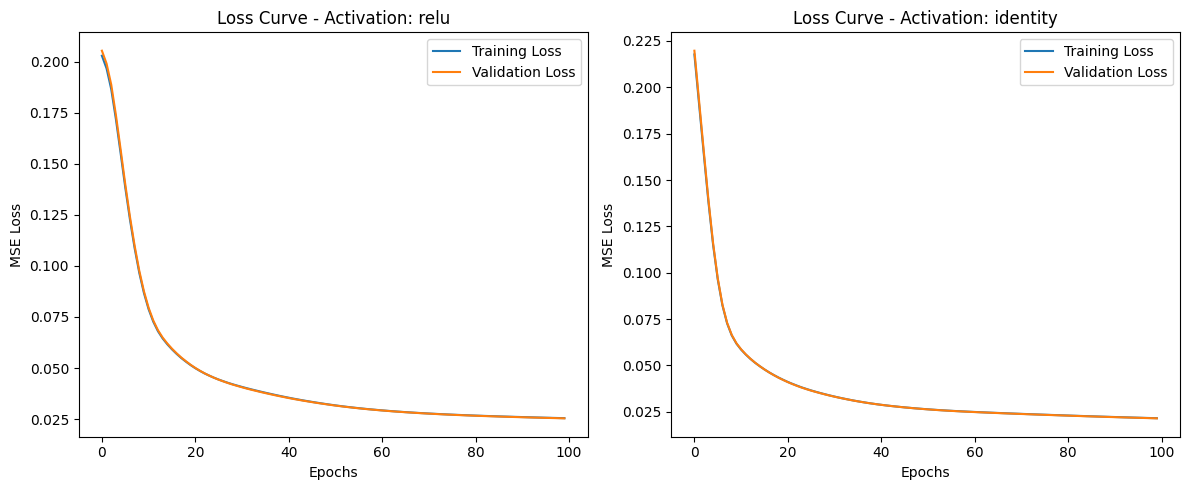

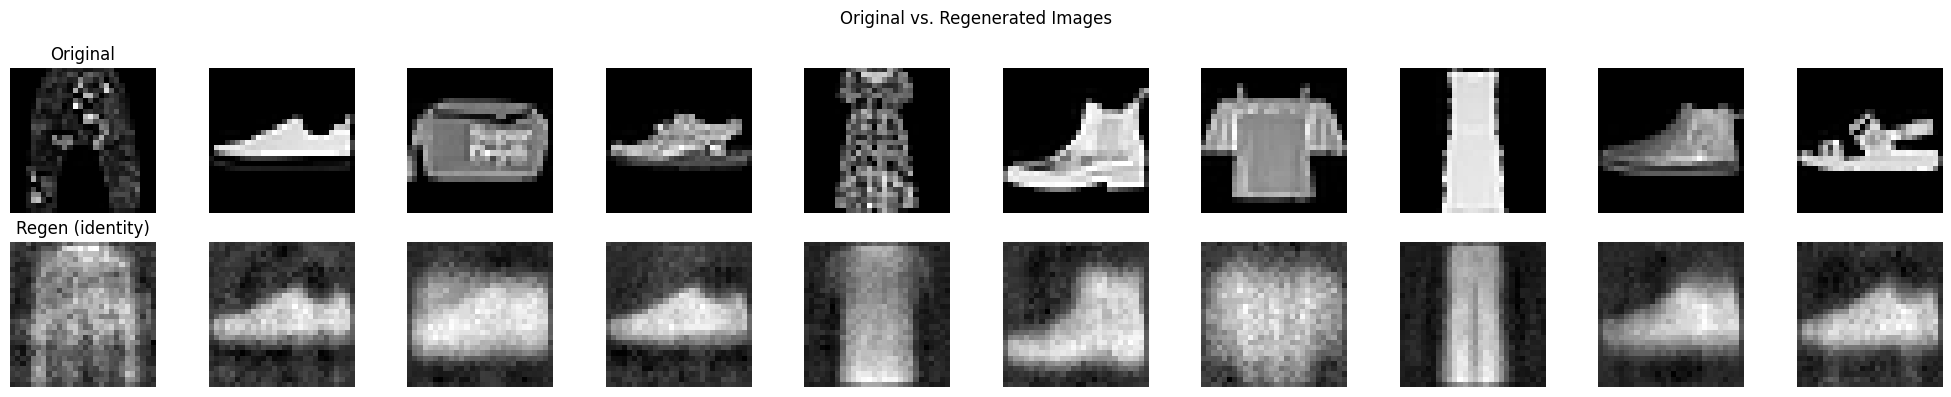

In [ ]:

c, b, a = 128, 64, 32
layer_sizes = [c, b, a, b, c]

X_train_main, X_val, y_train_main, y_val = train_test_split(X_train, X_train, test_size=0.2, random_state=42)

learning_rate = 2e-5
max_iter = 100
activations = ['relu', 'identity']
histories = {}

for activation in activations:
    print(f"Training with activation function: {activation}")
    model = MLPRegressor(hidden_layer_sizes=layer_sizes, activation=activation, solver='adam', 
                         learning_rate_init=learning_rate, max_iter=1, warm_start=True, batch_size=128)

    train_losses = []
    val_losses = []

    for epoch in range(max_iter):
        model.fit(X_train_main, y_train_main)

        train_loss = mean_squared_error(y_train_main, model.predict(X_train_main))
        val_loss = mean_squared_error(y_val, model.predict(X_val))
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        
        print(f"Epoch {epoch + 1}/{max_iter} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f}")
    
    histories[activation] = {'train_loss': train_losses, 'val_loss': val_losses}

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, activation in enumerate(activations):
    axes[i].plot(histories[activation]['train_loss'], label='Training Loss')
    axes[i].plot(histories[activation]['val_loss'], label='Validation Loss')
    axes[i].set_title(f"Loss Curve - Activation: {activation}")
    axes[i].set_xlabel("Epochs")
    axes[i].set_ylabel("MSE Loss")
    axes[i].legend()
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 10, figsize=(20, 4))
random_indices = np.random.choice(range(len(X_test)), 10, replace=False)

for i, activation in enumerate(activations):
    model = MLPRegressor(hidden_layer_sizes=layer_sizes, activation=activation, solver='adam', 
                         learning_rate_init=learning_rate, max_iter=max_iter, batch_size=128)
    model.fit(X_train, X_train)  
    regenerated_images = model.predict(X_test[random_indices])

    for j, idx in enumerate(random_indices):
        original_image = X_test[idx].reshape(28, 28)
        regenerated_image = regenerated_images[j].reshape(28, 28)

        axes[0, j].imshow(original_image, cmap='gray')
        axes[0, j].axis('off')
        if j == 0:
            axes[0, j].set_title(f"Original")

        axes[1, j].imshow(regenerated_image, cmap='gray')
        axes[1, j].axis('off')
        if j == 0:
            axes[1, j].set_title(f"Regen ({activation})")

plt.suptitle("Original vs. Regenerated Images")
plt.tight_layout()
plt.show()


In [ ]:

c, b, a = 128, 64, 32
layer_sizes = [c, b, a, b, c]
learning_rate = 2e-5
max_iter = 100

model_relu = MLPRegressor(hidden_layer_sizes=layer_sizes, activation='relu', solver='adam', 
                          learning_rate_init=learning_rate, max_iter=max_iter, batch_size=128, random_state=42)
model_relu.fit(X_train, X_train)  

small_layer_sizes = [a, a]
max_iter_classifier = 200

mlp_classifier_relu = MLPClassifier(hidden_layer_sizes=small_layer_sizes, activation='relu', solver='adam', 
                                    learning_rate_init=learning_rate, max_iter=max_iter_classifier, batch_size=128, random_state=42)

mlp_classifier_identity = MLPClassifier(hidden_layer_sizes=small_layer_sizes, activation='identity', solver='adam', 
                                        learning_rate_init=learning_rate, max_iter=max_iter_classifier, batch_size=128, random_state=42)

train_features = np.round(model_relu.predict(X_train))  
test_features = np.round(model_relu.predict(X_test))   

mlp_classifier_relu.fit(train_features, y_train)
mlp_classifier_identity.fit(train_features, y_train)


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of smaller MLP Classifier with ReLU activation: 0.6940
Accuracy of smaller MLP Classifier with Identity activation: 0.6940


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
